<a href="https://colab.research.google.com/github/fiapdatanalytics/tech-challenge4/blob/main/Tech_Challenge_4_Data_viz_and_production_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tech Challenge 4 - Data viz and production models**

## **Desafio**

🎯 Objetivo do Projeto

Desenvolver um modelo preditivo de Machine Learning para auxiliar uma equipe médica a diagnosticar níveis de obesidade em pacientes, com assertividade mínima de 75%, deployado em uma aplicação Streamlit, acompanhado de dashboard analítico e vídeo de apresentação.

🧩 Entregáveis Principais

* Pipeline de Machine Learning
* Feature engineering, treinamento e avaliação do modelo.
* Modelo com acurácia ≥ 75%
* Deploy no Streamlit
* Aplicação funcional acessível por link público.
* Dashboard analítico
* Visualização dos principais insights.
* Documentação (.doc ou .txt)
* Links do app, dashboard e repositório GitHub.
* Vídeo de apresentação (4 a 10 minutos)


##**Dicionário de Dados**

* **Gender:** Gênero.
* **Age:** Idade.
* **Height:** Altura em metros.
* **Weight:** Peso em kgs.
* **family_history:** Algum membro da família sofreu ou sofre de excesso de
peso?
* **FAVC:** Você come alimentos altamente calóricos com frequência?
* **FCVC:** Você costuma comer vegetais nas suas refeições?
* **NCP:** Quantas refeições principais você faz diariamente?
* **CAEC:** Você come alguma coisa entre as refeições?
* **SMOKE:** Você fuma?
* **CH2O:** Quanta água você bebe diariamente?
* **SCC:** Você monitora as calorias que ingere diariamente?
* **FAF:** Com que frequência você pratica atividade física?
* **TER:** Quanto tempo você usa dispositivos tecnológicos como celular,
videogame, televisão, computador e outros?
* **CALC:** Com que frequência você bebe álcool?
* **MTRANS:** Qual meio de transporte você costuma usar?
* **Obesity_level (coluna alvo):** Nível de obesidade

# **Bibliotecas**

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# **Funções**

## **Histograma**

In [76]:
def gera_histograma(df: pd.DataFrame, coluna: str, titulo: str):
    """
    Gera um histograma para uma coluna específica de um DataFrame.

    Args:
        df (pd.DataFrame): O DataFrame contendo os dados.
        coluna (str): O nome da coluna para gerar o histograma.
        titulo (str): O título do gráfico.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=coluna, kde=True)
    plt.title(titulo)
    plt.xlabel(coluna)
    plt.ylabel("Frequência")
    plt.show()

# **Dados**

In [2]:
# importando a base de dados Obesity.csv
df = pd.read_csv('https://raw.githubusercontent.com/fiapdatanalytics/tech-challenge4/refs/heads/main/data/Obesity.csv')

In [3]:
# visualização dos 5 primeiros registros da base
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [5]:
df.shape

(2111, 17)

# **Transformações**

## **Dicionários**

In [6]:
mapa_sim_nao = {
    'no': 0,
    'yes': 1
}

In [7]:
mapa_frequencia = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

## **Alteração nomes Colunas**

In [8]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')

In [9]:
mapa_colunas = {
    'Gender': 'genero',
    'Age': 'idade',
    'Height': 'altura',
    'Weight': 'peso',
    'family_history': 'historico_familiar',
    'FAVC': 'favc',
    'FCVC': 'fcvc',
    'NCP': 'ncp',
    'CAEC': 'caec',
    'SMOKE': 'fumante',
    'CH2O': 'ch20',
    'SCC' : 'scc',
    'FAF': 'faf',
    'TUE': 'tue',
    'CALC': 'calc',
    'MTRANS': 'mtrans',
    'Obesity': 'obesidade'
}


In [10]:
df = df.rename(columns=mapa_colunas)

In [11]:
df.columns

Index(['genero', 'idade', 'altura', 'peso', 'historico_familiar', 'favc',
       'fcvc', 'ncp', 'caec', 'fumante', 'ch20', 'scc', 'faf', 'tue', 'calc',
       'mtrans', 'obesidade'],
      dtype='object')

## **Coluna Gender**

Novo nome: genero

Female = 0

Male = 1

In [12]:
df.genero.unique()

array(['Female', 'Male'], dtype=object)

In [13]:
df.groupby('genero').size()

,0
genero,
Female,1043
Male,1068


In [14]:
mapa_genero = {
    'Female': 0,
    'Male': 1
}
df['genero'] = df['genero'].map(mapa_genero)

In [15]:
df.genero.unique()

array([0, 1])

In [16]:
df.groupby('genero').size()

,0
genero,
0,1043
1,1068


## **Coluna family_history**

novo nome: historico familiar

no = 0

yes = 1

In [17]:
df.historico_familiar.unique()

array(['yes', 'no'], dtype=object)

In [18]:
df.groupby('historico_familiar').size()

,0
historico_familiar,
no,385
yes,1726


In [19]:
df.historico_familiar = df.historico_familiar.map(mapa_sim_nao)

In [20]:
df.historico_familiar.unique()

array([1, 0])

In [21]:
df.groupby('historico_familiar').size()

,0
historico_familiar,
0,385
1,1726


## **Coluna CAEC**

novo nome: caec

no = 0

Sometimes = 1

Frequently = 2
    
Always = 3

In [22]:
df.caec.unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [23]:
df.groupby('caec').size()

,0
caec,
Always,53
Frequently,242
Sometimes,1765
no,51


In [24]:
df.caec = df.caec.map(mapa_frequencia)

In [25]:
df.caec.unique()

array([1, 2, 3, 0])

In [26]:
df.groupby('caec').size()

,0
caec,
0,51
1,1765
2,242
3,53


## **Coluna Smoke**

novo nome: fumante

no = 0

yes = 1



In [27]:
df.fumante.unique()

array(['no', 'yes'], dtype=object)

In [28]:
df.groupby('fumante').size()

,0
fumante,
no,2067
yes,44


In [29]:
df.fumante = df.fumante.map(mapa_sim_nao)

In [30]:
df.fumante.unique()

array([0, 1])

In [31]:
df.groupby('fumante').size()

,0
fumante,
0,2067
1,44


## **Coluna SCC**

novo nome: scc

no = 0

yes = 1

In [32]:
df.scc.unique()

array(['no', 'yes'], dtype=object)

In [33]:
df.groupby('scc').size()

,0
scc,
no,2015
yes,96


In [34]:
df.scc = df.scc.map(mapa_sim_nao)

In [35]:
df.scc.unique()

array([0, 1])

In [36]:
df.groupby('scc').size()

,0
scc,
0,2015
1,96


## **Coluna CALC**

novo nome: calc

no = 0

Sometimes = 1

Frequently = 2
    
Always = 3

In [37]:
df.calc.unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [38]:
df.groupby('calc').size()

,0
calc,
Always,1
Frequently,70
Sometimes,1401
no,639


In [39]:
df.calc = df.calc.map(mapa_frequencia)

In [40]:
df.calc.unique()

array([0, 1, 2, 3])

In [41]:
df.groupby('calc').size()

,0
calc,
0,639
1,1401
2,70
3,1


## **Coluna MTRANS**

novo nome: mtrans

Public_Transportation = 0

Walking = 1

Automobile = 2

Motorbike = 3

Bike = 4

In [42]:
df.mtrans.unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [43]:
df.groupby('mtrans').size()

,0
mtrans,
Automobile,457
Bike,7
Motorbike,11
Public_Transportation,1580
Walking,56


In [44]:
mapa_transporte = {
    'Public_Transportation': 0,
    'Walking': 1,
    'Automobile': 2,
    'Motorbike': 3,
    'Bike': 4
}

In [45]:
df.mtrans = df.mtrans.map(mapa_transporte)

In [46]:
df.mtrans.unique()

array([0, 1, 2, 3, 4])

In [47]:
df.groupby('mtrans').size()

,0
mtrans,
0,1580
1,56
2,457
3,11
4,7


## **Coluna Obesity**

novo nome: obesidade

In [48]:
df.obesidade.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [63]:
df.groupby('obesidade').size()

,0
obesidade,
Insufficient_Weight,272
Normal_Weight,287
Obesity_Type_I,351
Obesity_Type_II,297
Obesity_Type_III,324
Overweight_Level_I,290
Overweight_Level_II,290


In [64]:
mapa_obesidade = {
    'Normal_Weight': 'peso_normal',
    'Overweight_Level_I': 'sobrepeso_tipo_1',
    'Overweight_Level_II':'sobrepeso_tipo_2',
    'Obesity_Type_I': 'obesidade_tipo_1',
    'Insufficient_Weight': 'peso_insuficiente',
    'Obesity_Type_II': 'obesidade_tipo_2',
    'Obesity_Type_III': 'obesidade_tipo_3'

}

In [65]:
df.obesidade = df.obesidade.map(mapa_obesidade)

In [66]:
df.groupby('obesidade').size()

,0
obesidade,
obesidade_tipo_1,351
obesidade_tipo_2,297
obesidade_tipo_3,324
peso_insuficiente,272
peso_normal,287
sobrepeso_tipo_1,290
sobrepeso_tipo_2,290


## **Criação coluna IMC**

In [50]:
df['imc'] = round(df['peso'] / (df['altura'] * df['altura']),2)
display(df.head())

,genero,idade,altura,peso,historico_familiar,favc,fcvc,ncp,caec,fumante,ch20,scc,faf,tue,calc,mtrans,obesidade,imc
0,0,21.0,1.62,64.0,1,no,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,Normal_Weight,24.39
1,0,21.0,1.52,56.0,1,no,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,Normal_Weight,24.24
2,1,23.0,1.80,77.0,1,no,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,Normal_Weight,23.77
3,1,27.0,1.80,87.0,0,no,3.0,3.0,1,0,2.0,0,2.0,0.0,2,1,Overweight_Level_I,26.85
4,1,22.0,1.78,89.8,0,no,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,Overweight_Level_II,28.34


# **Exploração**

## **Estatística básica**

### **Descritivo Geral da base**

In [51]:
df.describe()

,genero,idade,altura,peso,historico_familiar,fcvc,ncp,caec,fumante,ch20,scc,faf,tue,calc,mtrans,imc
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407,0.488394,29.700137
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,0.868475,8.011354
min,0.000000,14.000000,1.450000,39.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,0.000000,24.325000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,0.000000,28.720000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,1.000000,36.015000
max,1.000000,61.000000,1.980000,173.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,50.810000


## **Análise exploratória**

### **Quantidade de ocorrências variável obesidade**

In [68]:
# Calcular a contagem de cada nível de obesidade
obesidade_contagem = df['obesidade'].value_counts().reset_index()
obesidade_contagem.columns = ['classificacao_peso_corporal', 'quantidade']

# Definir a ordem desejada para as categorias de obesidade
ordem_obesidade = [
    'peso_insuficiente',
    'peso_normal',
    'sobrepeso_tipo_1',
    'sobrepeso_tipo_2',
    'obesidade_tipo_1',
    'obesidade_tipo_2',
    'obesidade_tipo_3'
]

# Reordenar o DataFrame de contagem de acordo com a ordem definida
obesidade_contagem['classificacao_peso_corporal'] = pd.Categorical(
    obesidade_contagem['classificacao_peso_corporal'],
    categories=ordem_obesidade,
    ordered=True
)
obesidade_counts = obesidade_contagem.sort_values('classificacao_peso_corporal').reset_index(drop=True)

# Calcular a porcentagem
total_linhas = df.shape[0]
obesidade_counts['porcentagem'] = round((obesidade_counts['quantidade'] / total_linhas) * 100, 2)

# Exibir o novo DataFrame
display(obesidade_counts)

,classificacao_peso_corporal,quantidade,porcentagem
0,peso_insuficiente,272,12.88
1,peso_normal,287,13.60
2,sobrepeso_tipo_1,290,13.74
3,sobrepeso_tipo_2,290,13.74
4,obesidade_tipo_1,351,16.63
5,obesidade_tipo_2,297,14.07
6,obesidade_tipo_3,324,15.35


/tmp/ipython-input-25911584.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=coluna, kde=True, palette='colorblind') # Adicionado palette='colorblind'


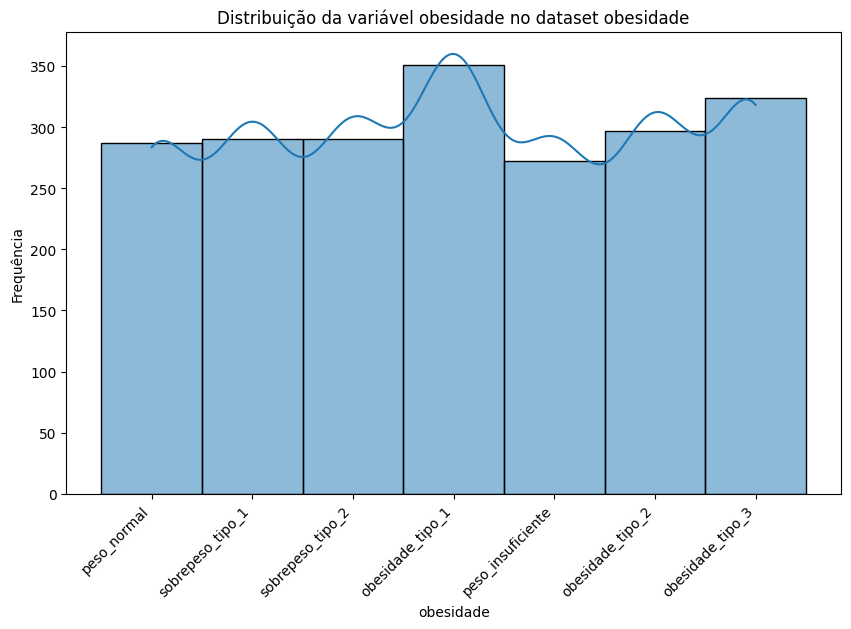

In [75]:
titulo_histograma_obesidade = 'Distribuição da variável obesidade no dataset obesidade'
histograma_obesidade = gera_histograma(df, 'obesidade', titulo_histograma_obesidade)

### **Obesidade por genero**

In [101]:
# Agrupar por obesidade e contar a ocorrência de cada gênero
obesidade_genero_counts = round(df.groupby('obesidade')['genero'].value_counts(normalize=True).mul(100).reset_index(name='porcentagem'),2)

# Pivotar a tabela para ter as quantidades de feminino e masculino como colunas
obesidade_genero_pivot = obesidade_genero_counts.pivot(index='obesidade', columns='genero', values='porcentagem').reset_index()

# Renomear as colunas para o formato desejado
obesidade_genero_pivot.columns = ['classificacao_peso_corporal', 'qtde_feminino', 'qtde_masculino']

# Definir a ordem desejada para as categorias de obesidade
ordem_obesidade = [
    'peso_insuficiente',
    'peso_normal',
    'sobrepeso_tipo_1',
    'sobrepeso_tipo_2',
    'obesidade_tipo_1',
    'obesidade_tipo_2',
    'obesidade_tipo_3'
]

# Converter a coluna 'classificacao_peso_corporal' para tipo categórico com a ordem definida
obesidade_genero_pivot['classificacao_peso_corporal'] = pd.Categorical(
    obesidade_genero_pivot['classificacao_peso_corporal'],
    categories=ordem_obesidade,
    ordered=True
)

# Ordenar o DataFrame pela ordem das categorias de obesidade
obesidade_genero_pivot = obesidade_genero_pivot.sort_values('classificacao_peso_corporal').reset_index(drop=True)

# Exibir o novo DataFrame
display(obesidade_genero_pivot)

,classificacao_peso_corporal,qtde_feminino,qtde_masculino
0,peso_insuficiente,63.60,36.40
1,peso_normal,49.13,50.87
2,sobrepeso_tipo_1,50.00,50.00
3,sobrepeso_tipo_2,35.52,64.48
4,obesidade_tipo_1,44.44,55.56
5,obesidade_tipo_2,0.67,99.33
6,obesidade_tipo_3,99.69,0.31


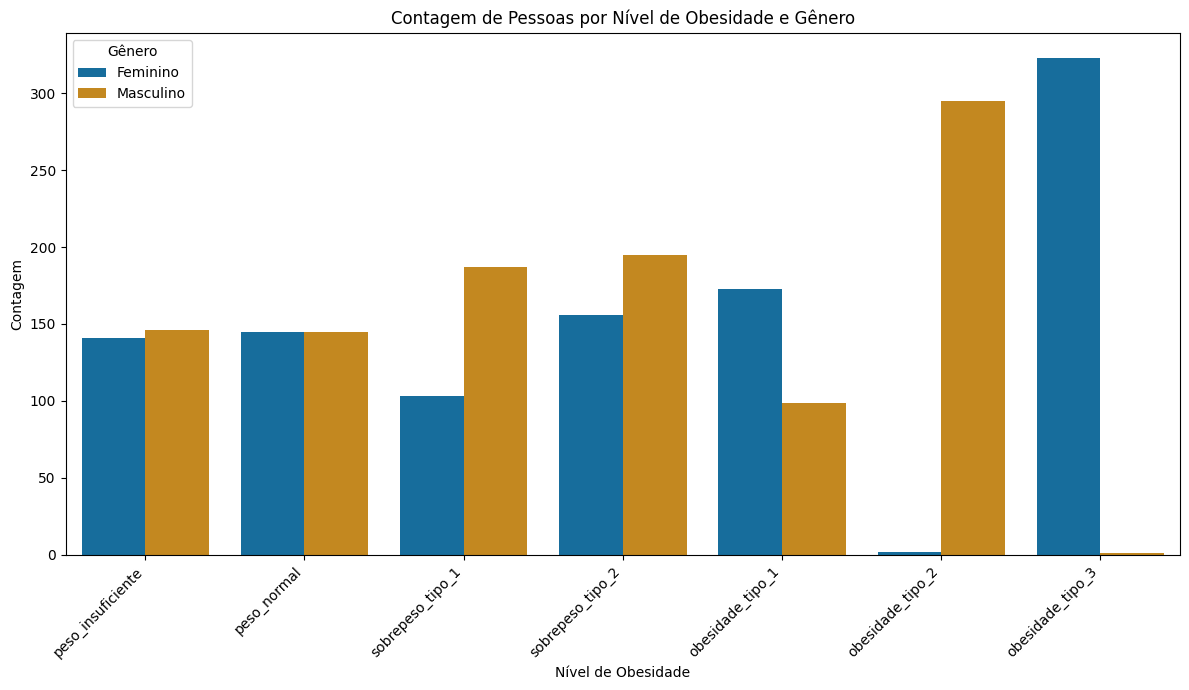

In [106]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='obesidade', hue='genero', palette='colorblind')

# Definir a ordem desejada para as categorias de obesidade em português para o eixo x
ordem_obesidade_pt = [
    'peso_insuficiente',
    'peso_normal',
    'sobrepeso_tipo_1',
    'sobrepeso_tipo_2',
    'obesidade_tipo_1',
    'obesidade_tipo_2',
    'obesidade_tipo_3'
]
plt.xticks(ticks=range(len(ordem_obesidade_pt)), labels=ordem_obesidade_pt, rotation=45, ha='right')


plt.title('Contagem de Pessoas por Nível de Obesidade e Gênero')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Contagem')
plt.legend(title='Gênero', labels=['Feminino', 'Masculino']) # Ajustar rótulos da legenda
plt.tight_layout()
plt.show()

### **Distribuição da variável IMC na base**

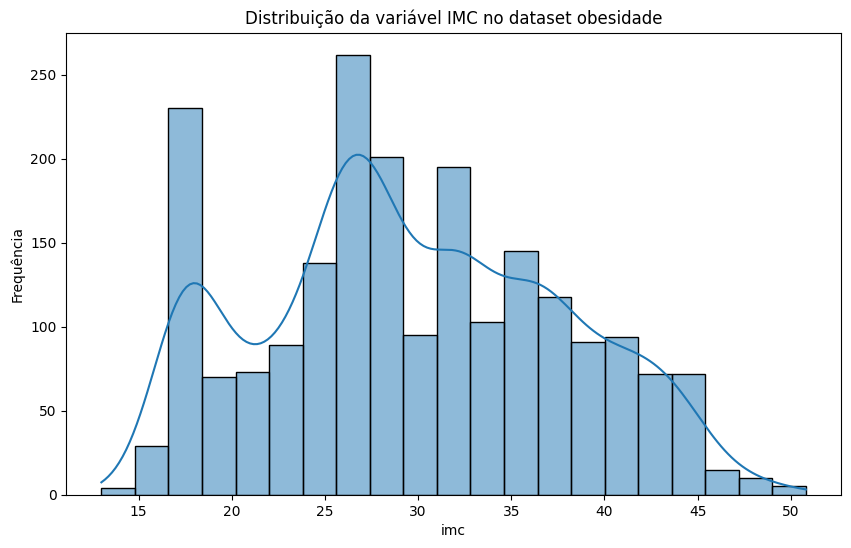

In [59]:
titulo_histograma_imc = 'Distribuição da variável IMC no dataset obesidade'
histograma_imc = gera_histograma(df, 'imc', titulo_histograma_imc)